In [46]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn for clustering and scaling
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Set plot style
sns.set(style="whitegrid")
plt.style.use('fivethirtyeight')

In [2]:
df=pd.read_csv('mall_customers.csv')

In [3]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
#Renaming columns for better usage

# Let's rename some columns for easier access
df.rename(columns={'Annual Income (k$)': 'Annual_Income',
                   'Spending Score (1-100)': 'Spending_Score'}, inplace=True)

In [5]:
df

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [6]:
df.describe()

,CustomerID,Age,Annual_Income,Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual_Income   200 non-null    int64 
 4   Spending_Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Text(0.5, 1.0, 'Distribution of Age')

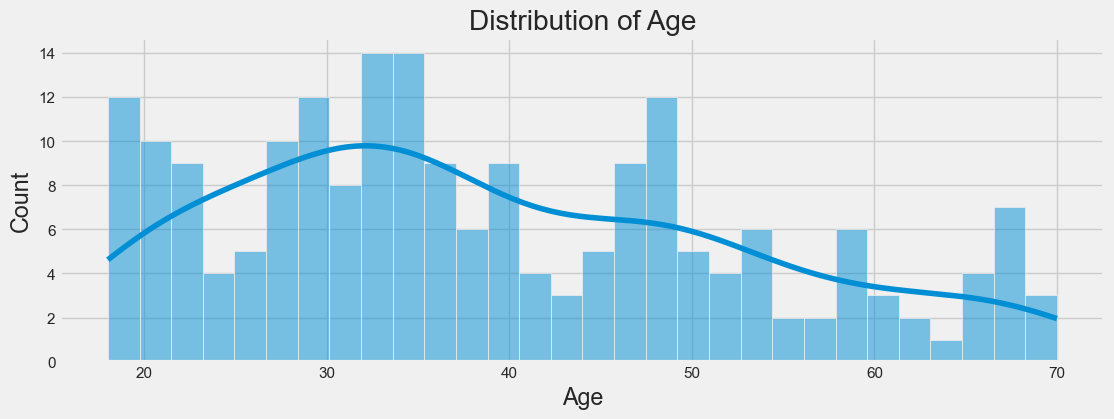

In [19]:
plt.figure(figsize=(12, 4))

# Age distribution
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Distribution of Age')

Text(0.5, 1.0, 'Distribution of Annual_Income')

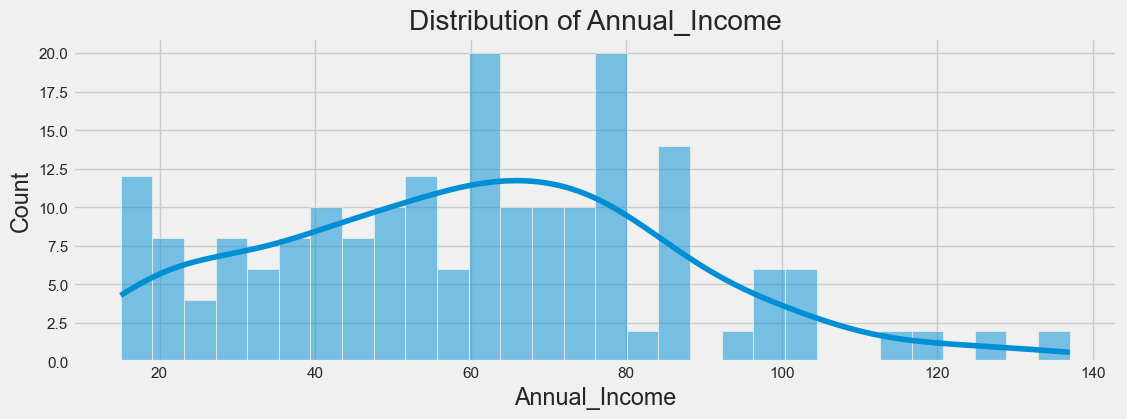

In [20]:
plt.figure(figsize=(12, 4))
# Age distribution
sns.histplot(df['Annual_Income'], bins=30, kde=True)
plt.title('Distribution of Annual_Income')

<Figure size 1000x600 with 0 Axes>

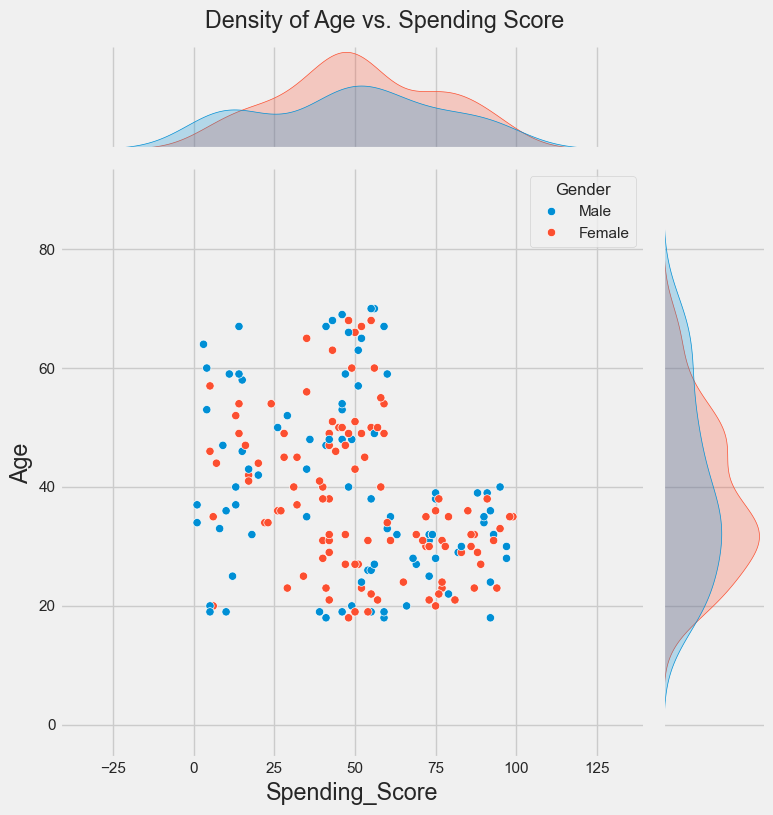

In [31]:
plt.figure(figsize=(10,6))
sns.jointplot(data=df, x='Spending_Score', y='Age',hue=df['Gender'], height=8,color='b')
plt.suptitle('Density of Age vs. Spending Score', y=1.02) # Add a title
plt.show()

<Axes: xlabel='Gender', ylabel='count'>

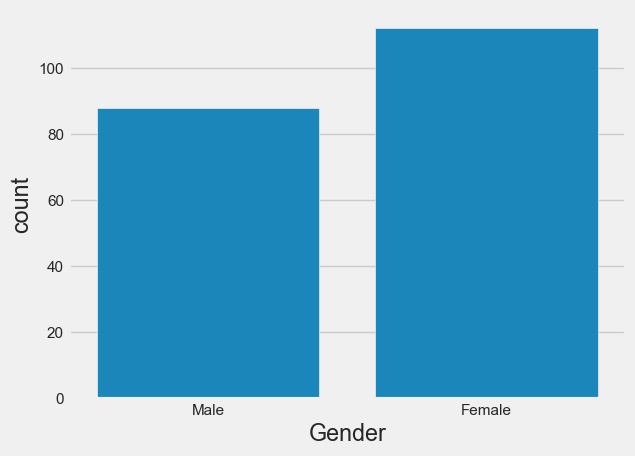

In [32]:
sns.countplot(data=df,x=df['Gender'])

<Axes: xlabel='Annual_Income', ylabel='Spending_Score'>

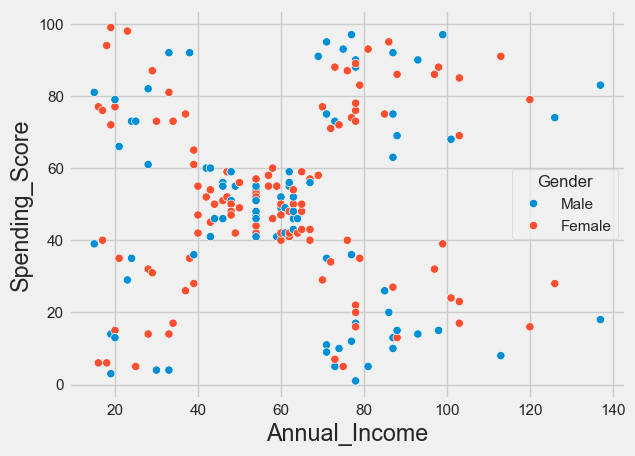

In [33]:
sns.scatterplot(data=df,x=df['Annual_Income'],y=df['Spending_Score'],hue=df['Gender'])

In [35]:
#cHECK FOR MISSING values

df.isnull().sum()

CustomerID        0
Gender            0
Age               0
Annual_Income     0
Spending_Score    0
dtype: int64

In [36]:
#check for duplicated rows if any

print(f"\nNumber of duplicate rows: {df.duplicated().sum()}")


Number of duplicate rows: 0


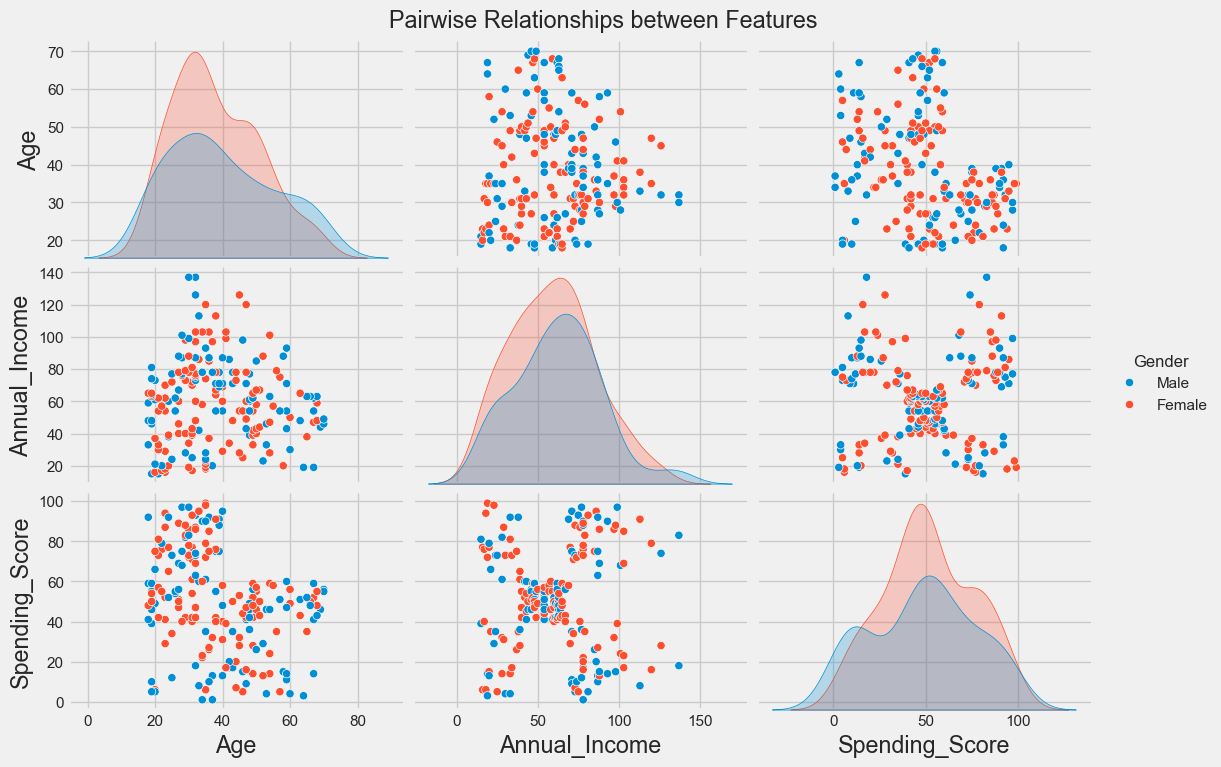

In [38]:
#top check scatterplot to understand visual clusters

# Pairplot to visualize relationships between numerical features
# We can color by 'Gender' to add another dimension
sns.pairplot(df.drop('CustomerID', axis=1), hue='Gender', aspect=1.5)
plt.suptitle('Pairwise Relationships between Features', y=1.02)
plt.show()

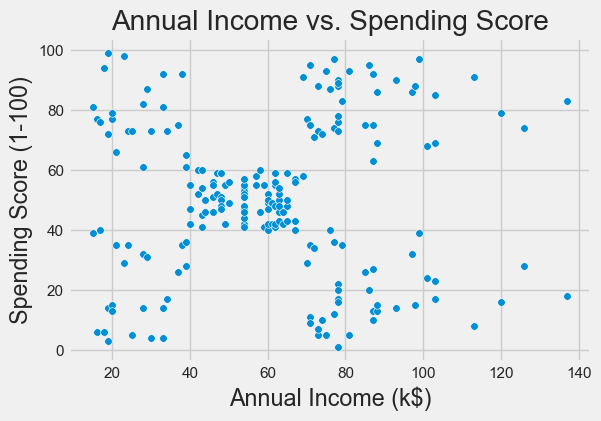

In [42]:
# Scatter plot of Annual Income vs. Spending Score
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Annual_Income', y='Spending_Score', data=df, s=30)
plt.title('Annual Income vs. Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [43]:
#The above seems promisable and does have clusters

In [44]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Check for duplicate rows if any
print(f"\nNumber of duplicate rows: {df.duplicated().sum()}")

Missing values in each column:
CustomerID        0
Gender            0
Age               0
Annual_Income     0
Spending_Score    0
dtype: int64

Number of duplicate rows: 0


In [45]:
X=df[['Annual_Income','Spending_Score']]

In [49]:
scaler=StandardScaler()
X_scaled = scaler.fit_transform(X)

In [53]:
#converting into data frame for confirmation of expected scaling
df_scaled=pd.DataFrame(X_scaled,columns=['Annual_Income','Spending_Score'])
df_scaled              

,Annual_Income,Spending_Score
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980
...,...,...
195,2.268791,1.118061
196,2.497807,-0.861839
197,2.497807,0.923953
198,2.917671,-1.250054


C:\download\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\download\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\download\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\download\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

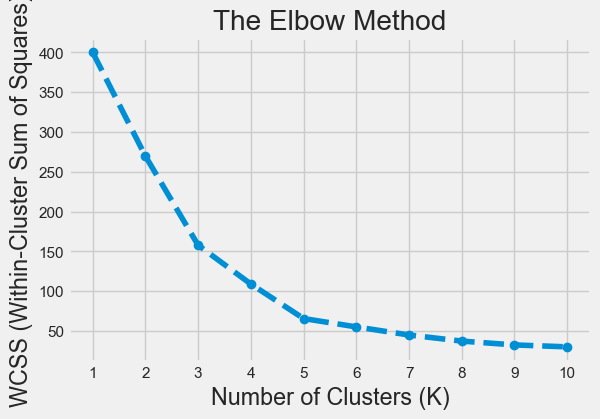

In [55]:
#We will use Elbow method to have the best possible K value
# Calculate WCSS for a range of K values
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_) # inertia_ is the WCSS value

# Plot the Elbow Method graph
plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.xticks(range(1, 11))
plt.show()

In [59]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)

# Adding the cluster labels back to the original DataFrame
df['Cluster'] = cluster_labels

display(df.head())

C:\download\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,CustomerID,Gender,Age,Annual_Income,Spending_Score,Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


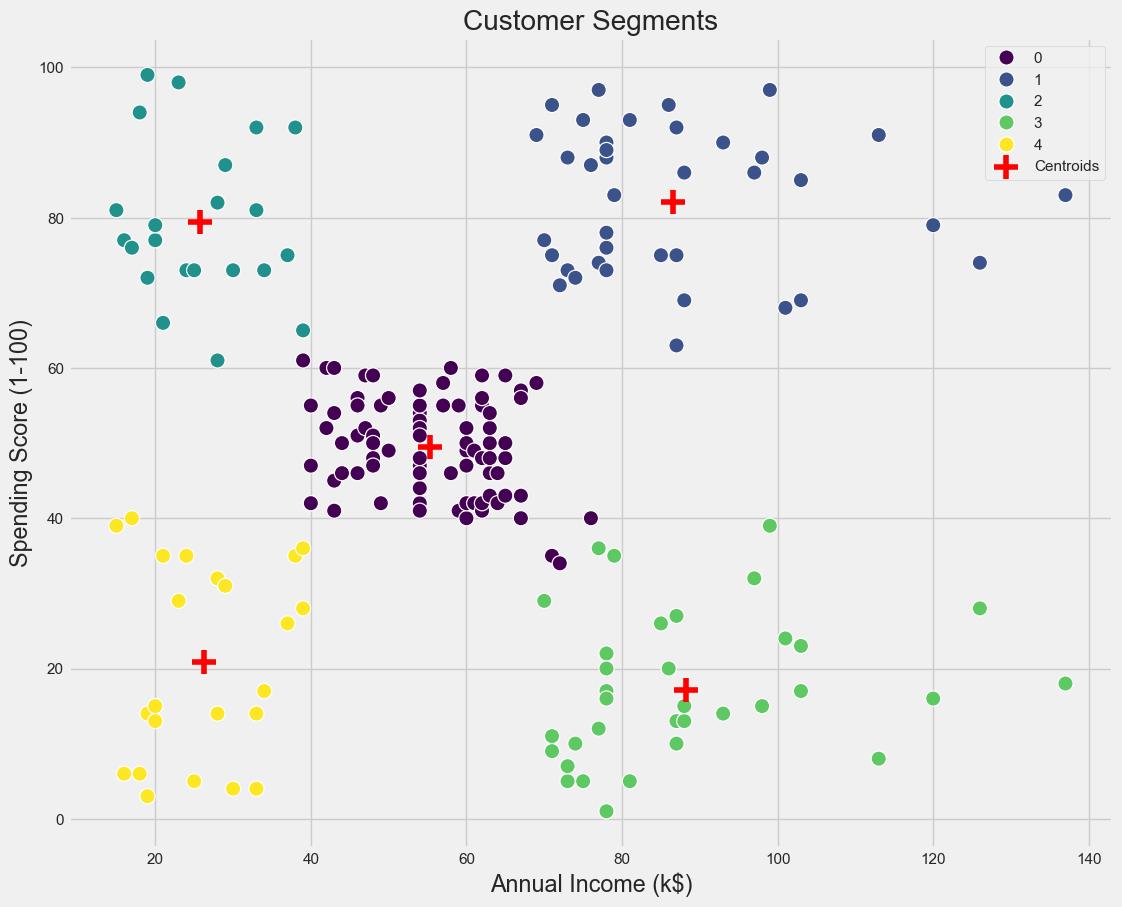

In [69]:
# Get the cluster centroids
centroids_scaled = kmeans.cluster_centers_

# Create a scatter plot of the clusters
plt.figure(figsize=(12, 10))
sns.scatterplot(x='Annual_Income', y='Spending_Score', hue='Cluster', data=df,
                palette='viridis', s=120, legend='full')

# Plot the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='+', label='Centroids')

plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [71]:
cluster_analysis = df.drop('CustomerID', axis=1).groupby('Cluster').mean(numeric_only=True)
display(cluster_analysis)

,Age,Annual_Income,Spending_Score
Cluster,,,
0,42.716049,55.296296,49.518519
1,32.692308,86.538462,82.128205
2,25.272727,25.727273,79.363636
3,41.114286,88.200000,17.114286
4,45.217391,26.304348,20.913043
